# **Installing Required Libraries**

In [1]:
!pip install bertopic
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from wordcloud import WordCloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 11.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 17.8 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (7

# **Dataset**

In [2]:
data = pd.read_csv("/content/drive/MyDrive/news_summary.csv", encoding='latin1')


In [3]:
data.head()

author                  date  \
0        Chhavi Tyagi  03 Aug 2017,Thursday   
1         Daisy Mowke  03 Aug 2017,Thursday   
2      Arshiya Chopra  03 Aug 2017,Thursday   
3       Sumedha Sehra  03 Aug 2017,Thursday   
4  Aarushi Maheshwari  03 Aug 2017,Thursday   

                                           headlines  \
0  Daman & Diu revokes mandatory Rakshabandhan in...   
1  Malaika slams user who trolled her for 'divorc...   
2  'Virgin' now corrected to 'Unmarried' in IGIMS...   
3  Aaj aapne pakad liya: LeT man Dujana before be...   
4  Hotel staff to get training to spot signs of s...   

                                           read_more  \
0  http://www.hindustantimes.com/india-news/raksh...   
1  http://www.hindustantimes.com/bollywood/malaik...   
2  http://www.hindustantimes.com/patna/bihar-igim...   
3  http://indiatoday.intoday.in/story/abu-dujana-...   
4  http://indiatoday.intoday.in/story/sex-traffic...   

                                                text  \
0  The Administration of Union Territory Daman an...   
1  Malaika Arora slammed an Instagram user who tr...   
2  The Indira Gandhi Institute of Medical Science...   
3  Lashkar-e-Taiba's Kashmir commander Abu Dujana...   
4  Hotels in Maharashtra will train their staff t...   

                                               ctext  
0  The Daman and Diu administration on Wednesday ...  
1  From her special numbers to TV?appearances, Bo...  
2  The Indira Gandhi Institute of Medical Science...  
3  Lashkar-e-Taiba's Kashmir commander Abu Dujana...  
4  Hotels in Mumbai and other Indian cities are t...

In [9]:
# Count of unique values for each variable
variable_counts = data.nunique()

# 1. Number of unique authors
num_authors = variable_counts['author']

# 2. Earliest and latest dates
earliest_date = data['date'].min()
latest_date = data['date'].max()

# 3. Total number of articles
total_articles = len(data)

# Create a dictionary for the statistics
statistics = {
    "Variable": ["Number of Authors", "Earliest Date", "Latest Date", "Total Articles"],
    "Statistics": [num_authors, earliest_date, latest_date, total_articles]
}

# Add counts for all variables
for col in data.columns:
    if col not in ['author', 'date']:
        variable_counts[col] = data[col].nunique()
        statistics["Variable"].append(f"Count of {col}")
        statistics["Statistics"].append(variable_counts[col])

# Create a DataFrame from the dictionary
statistics_df = pd.DataFrame(statistics)

# Print the statistics table
statistics_df.head(10)

Variable             Statistics
0   Number of Authors                     45
1       Earliest Date   01 Apr 2017,Saturday
2         Latest Date  31 May 2017,Wednesday
3      Total Articles                   4514
4  Count of headlines                   4514
5  Count of read_more                   4461
6       Count of text                   4514
7      Count of ctext                   4341

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Variable').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Statistics').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Statistics'].value_counts()
    for x_label, grp in _df_2.groupby('Variable')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Variable')
_ = plt.ylabel('Statistics')

# **Pre-Processing**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove non-alphabetic tokens and stop words
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

    # Lemmatization and stemming
    tokens = [lemmatizer.lemmatize(stemmer.stem(token)) for token in tokens]

    # Remove noise (e.g., special characters, numbers)
    tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens]

    return tokens

data['tokens'] = data['text'].apply(preprocess_text)

# Convert tokens to a dictionary
dictionary = Dictionary(data['tokens'])

# Convert tokens to a bag-of-words representation
corpus = [dictionary.doc2bow(doc) for doc in data['tokens']]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# **Model 1 LDA**

In [ ]:
# LDA Model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)

**Coherence Score**

In [ ]:
from gensim.models import CoherenceModel

# Compute coherence score for LDA model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data['tokens'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print(f'Coherence Score for LDA: {coherence_lda}')


Coherence Score for LDA: 0.3959603598047207


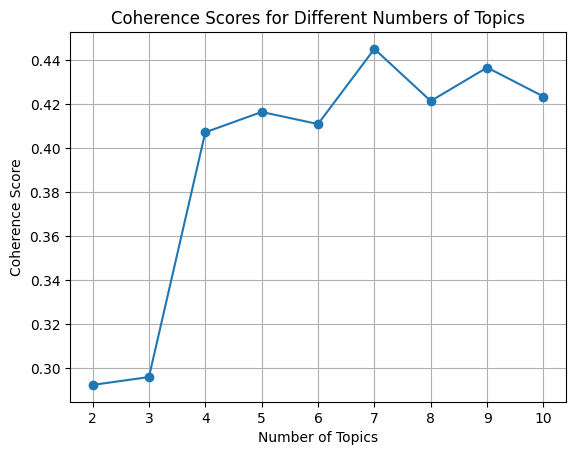

In [ ]:
import matplotlib.pyplot as plt

# Define a range of candidate numbers of topics
num_topics_range = range(2, 11)  # You can adjust this range as needed

# Compute coherence scores for different numbers of topics
coherence_scores = []
for num_topics in num_topics_range:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data['tokens'], dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model_lda.get_coherence())

# Plot coherence scores
plt.plot(num_topics_range, coherence_scores, marker='o')
plt.title('Coherence Scores for Different Numbers of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(num_topics_range)
plt.grid(True)
plt.show()


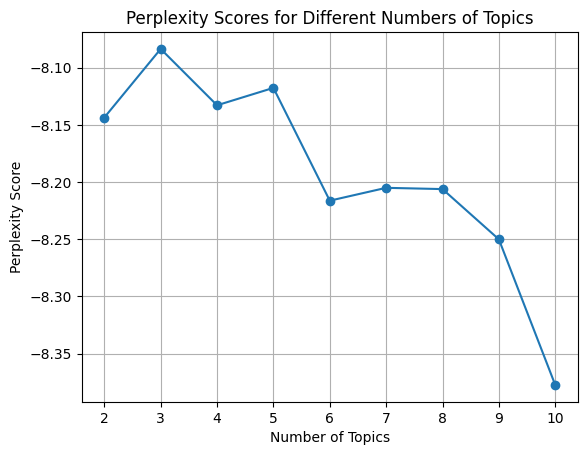

In [ ]:
# Define a range of candidate numbers of topics
num_topics_range = range(2, 11)

# Compute perplexity scores for different numbers of topics
perplexity_scores = []
for num_topics in num_topics_range:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)
    perplexity = lda_model.log_perplexity(corpus)
    perplexity_scores.append(perplexity)

# Plot perplexity scores
plt.plot(num_topics_range, perplexity_scores, marker='o')
plt.title('Perplexity Scores for Different Numbers of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score')
plt.xticks(num_topics_range)
plt.grid(True)
plt.show()

# **Topics Extraction**

In [ ]:
num_topics_range = range(2, 11)

# Initialize lists to store scores
perplexity_scores = []
coherence_scores = []

# Compute scores for different numbers of topics
for num_topics in num_topics_range:

    # Compute perplexity
    perplexity = lda_model.log_perplexity(corpus)
    perplexity_scores.append(perplexity)

    # Compute coherence
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data['tokens'], dictionary=dictionary, coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence)

# Create a DataFrame to store scores
scores_df = pd.DataFrame({
    'Number of Topics': list(num_topics_range),
    'Perplexity Score': perplexity_scores,
    'Coherence Score': coherence_scores
})

# Print the scores table
print(scores_df)

   Number of Topics  Perplexity Score  Coherence Score
0                 2         -8.377472         0.405017
1                 3         -8.377441         0.405017
2                 4         -8.377431         0.405017
3                 5         -8.377439         0.405017
4                 6         -8.377435         0.405017
5                 7         -8.377380         0.405017
6                 8         -8.377431         0.405017
7                 9         -8.377451         0.405017
8                10         -8.377409         0.405017


In [ ]:
# Get topics and their top words
topics_words = lda_model.show_topics(formatted=False)

# Print topics and their top words
for topic, words in topics_words:
    print(f"Topic {topic}: {', '.join([word[0] for word in words])}")

Topic 0: cricket, indian, test, team, court, india, former, captain, kohli, said
Topic 1: said, ad, bjp, minist, parti, chief, state, cm, peopl, leader
Topic 2: said, woman, pakistan, india, adityanath, polic, girl, minist, yogi, indian
Topic 3: said, india, year, world, govern, indian, nation, water, countri, time
Topic 4: crore, modi, narendra, pm, prime, year, india, said, project, pradesh
Topic 5: film, said, actor, ad, actress, khan, show, want, also, report
Topic 6: kill, kashmir, tweet, polic, pictur, singh, user, fisherman, post, jammu
Topic 7: air, said, bank, airport, two, report, flight, india, peopl, found
Topic 8: parti, seat, govern, state, minist, delhi, said, congress, elect, bjp
Topic 9: polic, said, delhi, allegedli, reportedli, offici, arrest, indian, report, offic


**Perplexity Score**

In [ ]:
perplexity = lda_model.log_perplexity(corpus)
print("Perplexity:", perplexity)

Perplexity: -8.37744421481543


# **Visualization of Topics LDA**

In [ ]:
!pip install pyldavis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Create the visualization
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)

# Save the visualization as an HTML file
pyLDAvis.save_html(lda_display, 'lda_visualization.html')

# Display the visualization
pyLDAvis.display(lda_display)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 15.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


# **Model 2 BERT**

In [ ]:
!pip install hdbscan
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN

# Initialize BERTopic model
bertopic_model = BERTopic(language="english", calculate_probabilities=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert token lists to strings
data['tokens_str'] = data['tokens'].apply(lambda x: ' '.join(x))

# Fit BERTopic model to the text data
topics, _ = bertopic_model.fit_transform(data['tokens_str'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/hdbscan/hdbscan_.py:1170: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  self._all_finite = is_finite(X)


# **Bert Embeddings**

In [ ]:
# Get BERT embeddings for each document
embeddings = bertopic_model.transform(data['tokens_str'])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **UMAP**

In [16]:
import numpy as np
from umap import UMAP

# Assuming embeddings is your tuple
probabilities = embeddings[1]

# Convert probabilities to a numpy array
data_array = np.array(probabilities)

# Apply UMAP
umap_model = UMAP(n_components=5, random_state=42)
umap_embeddings = umap_model.fit_transform(data_array)

# Check the shape of umap_embeddings
print("UMAP embeddings shape:", umap_embeddings.shape)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


UMAP embeddings shape: (4514, 5)


In [17]:
# Apply clustering using HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size=10, min_samples=5)
clusters = hdbscan_model.fit_predict(umap_embeddings)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/hdbscan/hdbscan_.py:1170: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  self._all_finite = is_finite(X)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


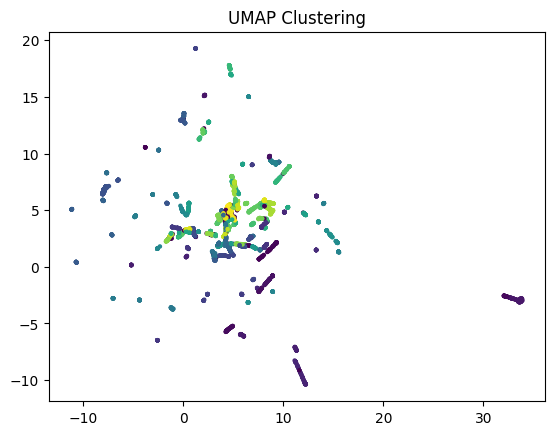

In [18]:
# Visualize the clusters
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=clusters, cmap='viridis', s=5)
plt.title("UMAP Clustering")
plt.show()

# **Visualization of topics using BERT**

In [19]:
bertopic_model.visualize_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# Get the topics
topics = bertopic_model.get_topics()

# Print the topics
for topic_id, words in topics.items():
    topic_words = [word[0] for word in words]  # Extract words from tuples
    print(f"Topic {topic_id}: {', '.join(topic_words)}")


Topic -1: said, delhi, govern, ad, polic, minist, state, also, woman, reportedli
Topic 0: cricket, team, test, captain, kohli, indian, player, world, former, champion
Topic 1: kashmir, kill, attack, terrorist, pakistan, jammu, terror, injur, milit, fire
Topic 2: court, case, suprem, high, convict, hear, plea, sentenc, order, justic
Topic 3: air, flight, airlin, passeng, airport, aircraft, pilot, plane, india, land
Topic 4: arrest, polic, allegedli, man, accus, rob, delhi, two, stole, murder
Topic 5: school, student, univers, colleg, teacher, class, educ, exam, admiss, result
Topic 6: trump, donald, presid, korea, obama, russian, north, white, russia, presidenti
Topic 7: khan, daughter, kapoor, saif, kareena, ali, sara, son, actor, child
Topic 8: jio, telecom, airtel, relianc, merger, trai, phone, vodafon, offer, telco
Topic 9: rape, girl, accus, sexual, woman, polic, assault, allegedli, victim, case
Topic 10: salman, film, khan, actor, rukh, shah, bachchan, best, award, role
Topic 11: 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [21]:
# Compute coherence score for BERTopic model
coherence_model_bertopic = CoherenceModel(model=bertopic_model, texts=data['tokens'], dictionary=dictionary, coherence='c_v')
coherence_bertopic = coherence_model_bertopic.get_coherence()

print(f'Coherence Score for BERTopic: {coherence_bertopic}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Coherence Score for BERTopic: 1.0


# **Hierarical Clustering**

In [22]:
bertopic_model.visualize_hierarchy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:350: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:351: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:352: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:353: DeprecationWarning:


# **Visualization using wordcloud**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



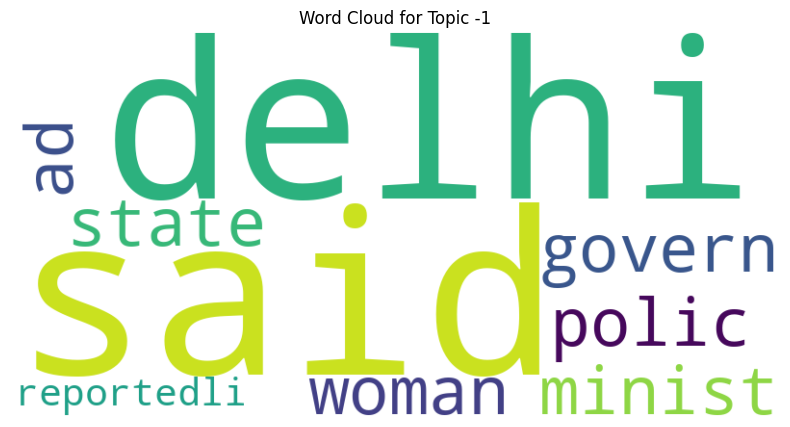

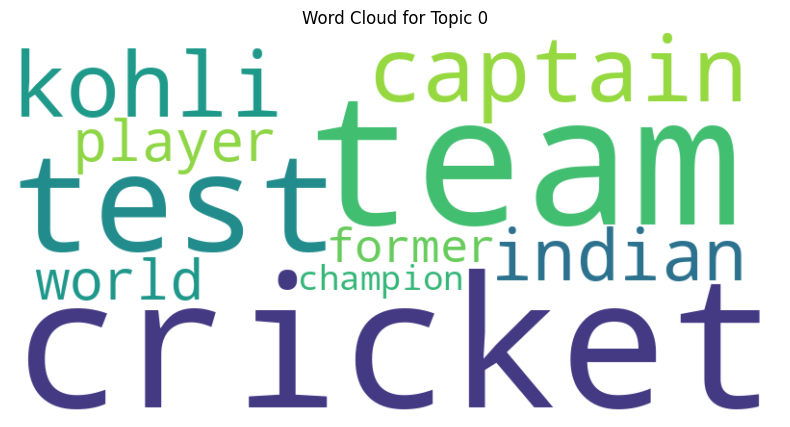

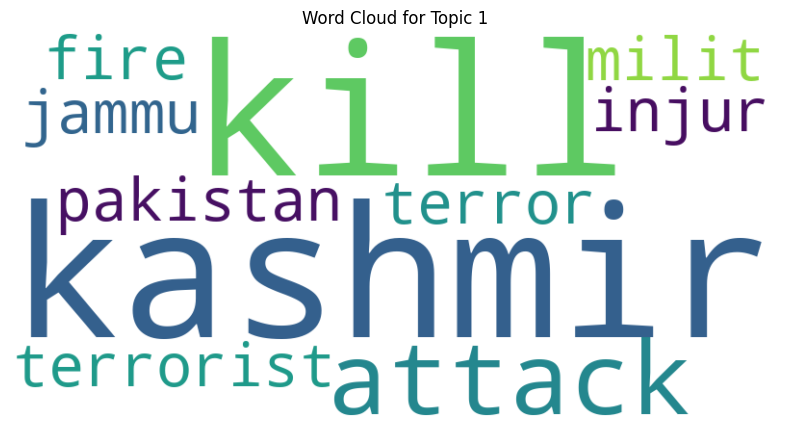

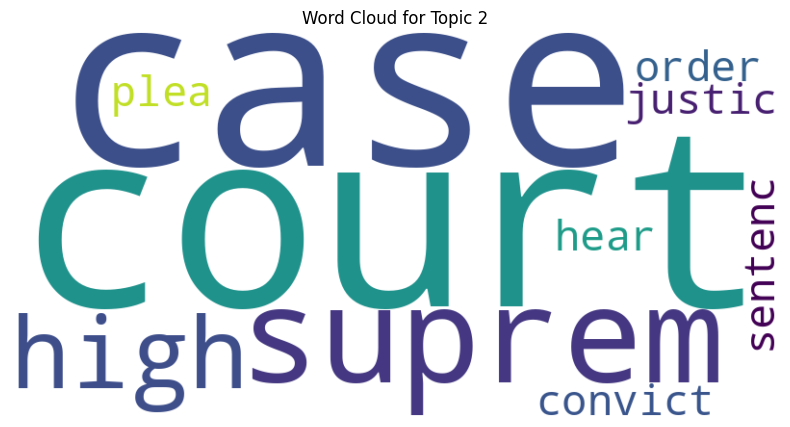

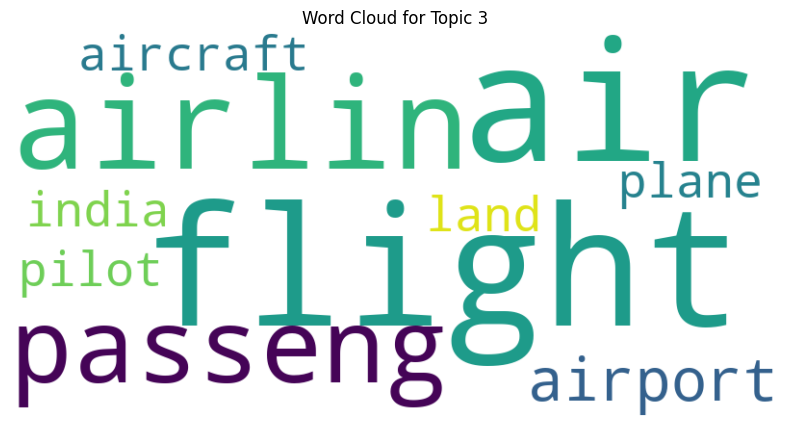

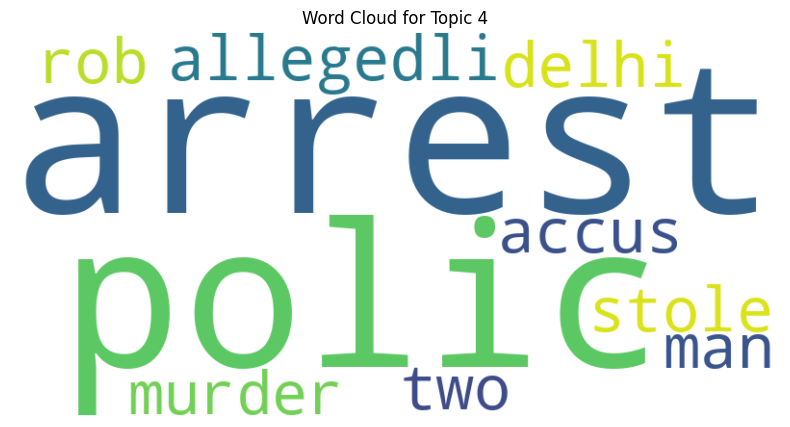

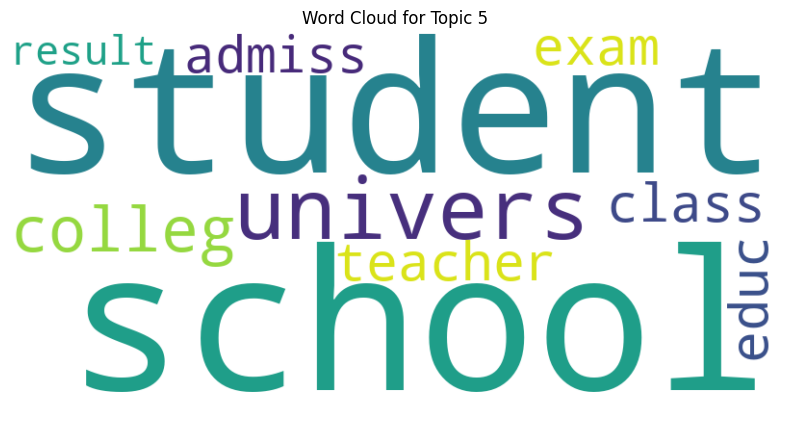

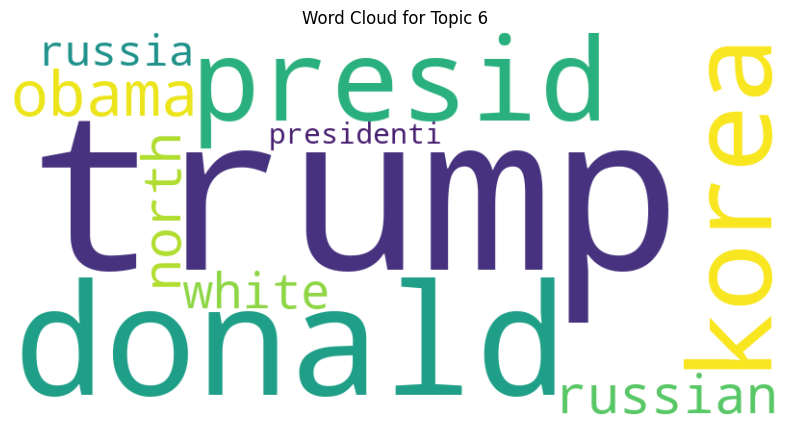

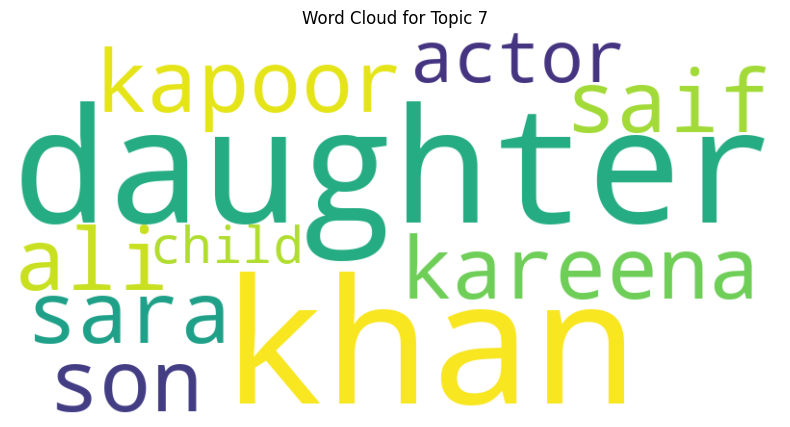

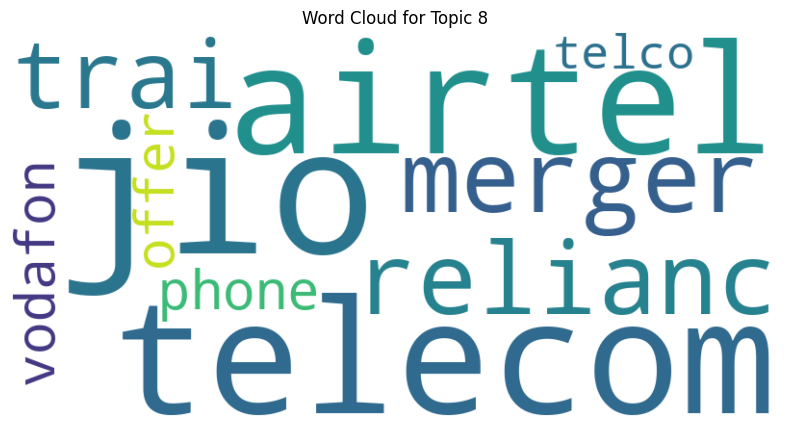

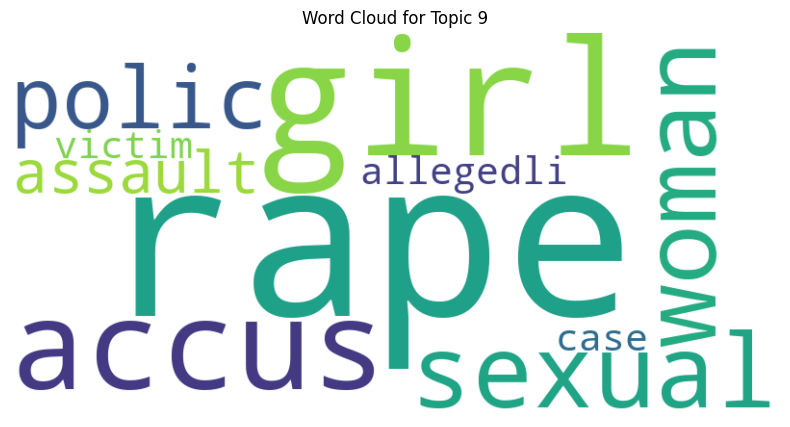

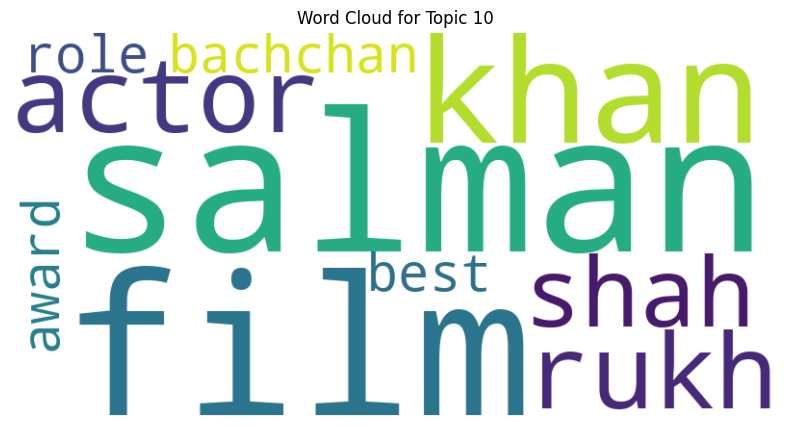

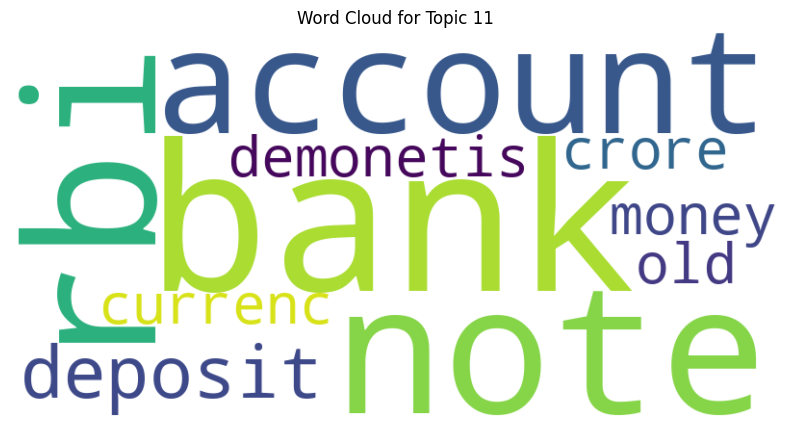

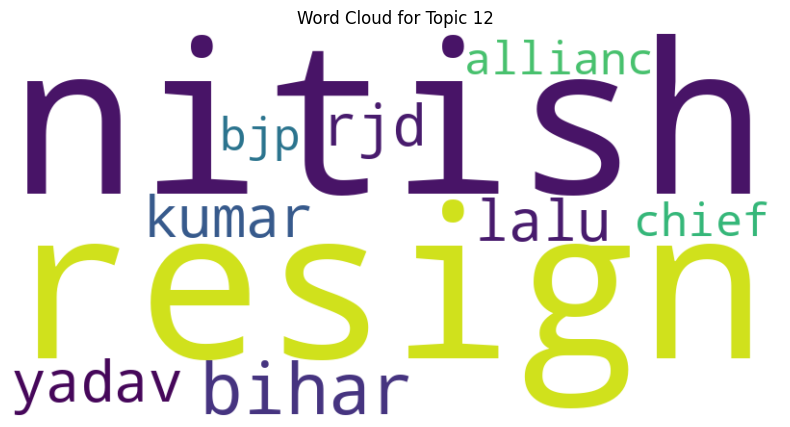

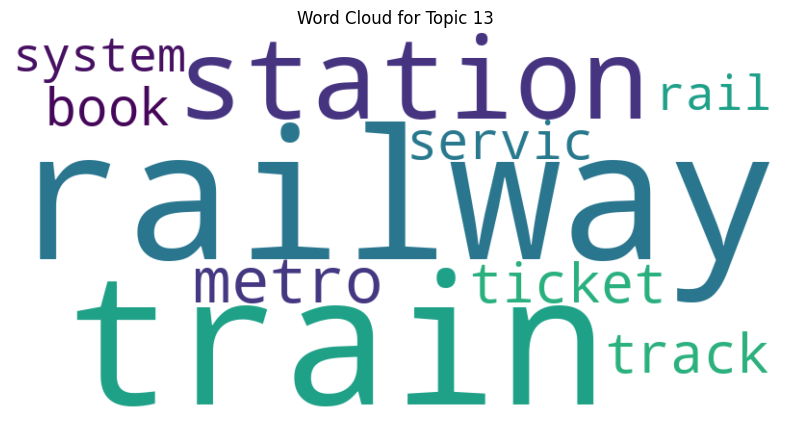

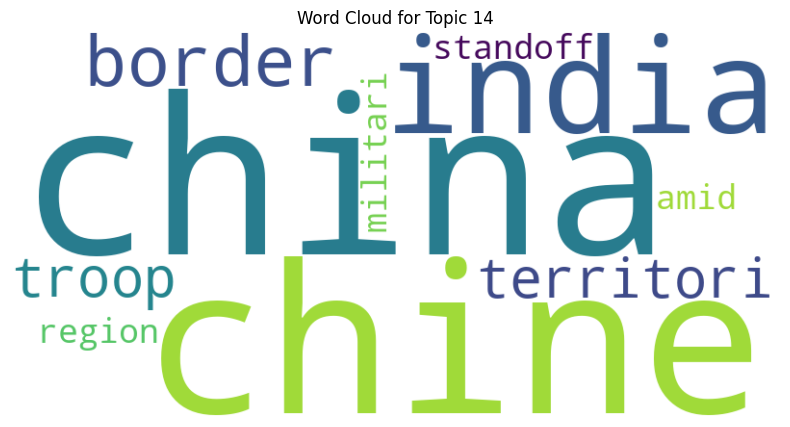

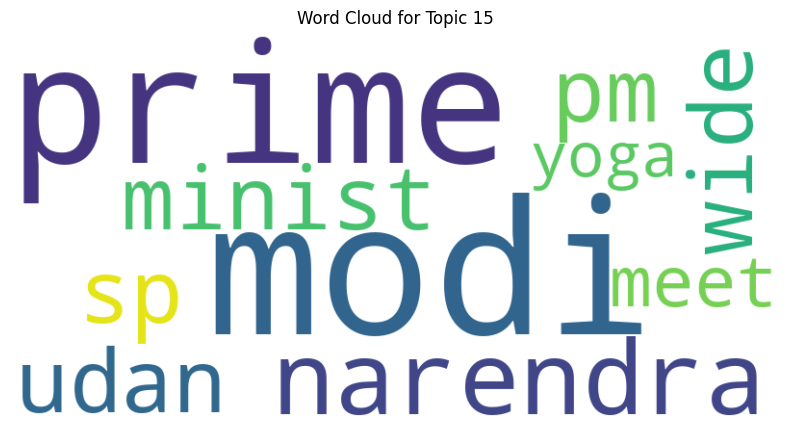

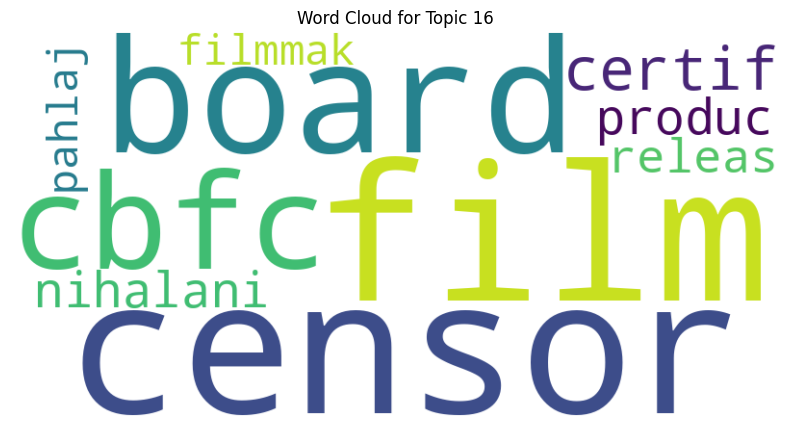

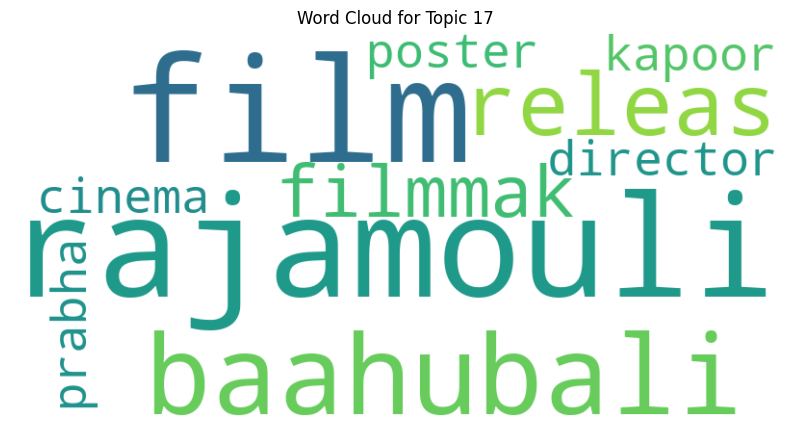

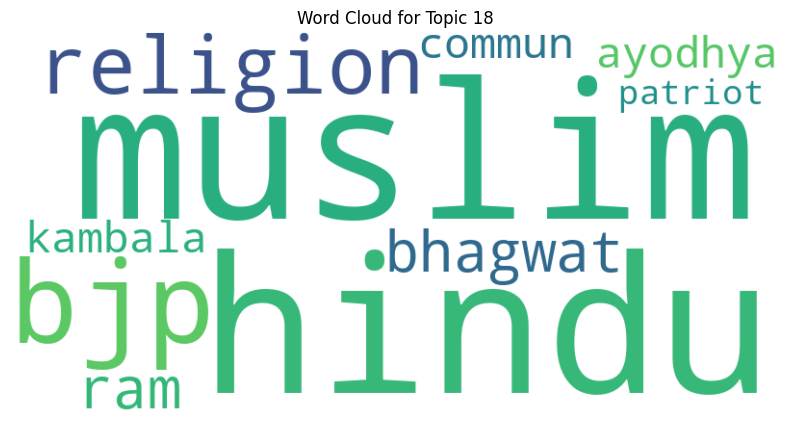

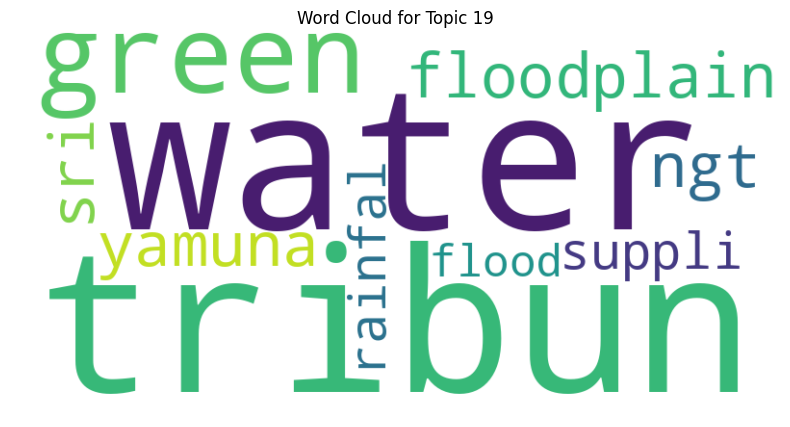

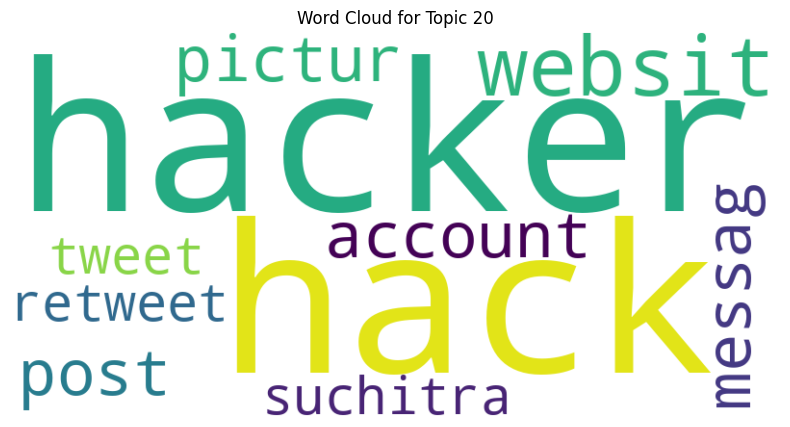

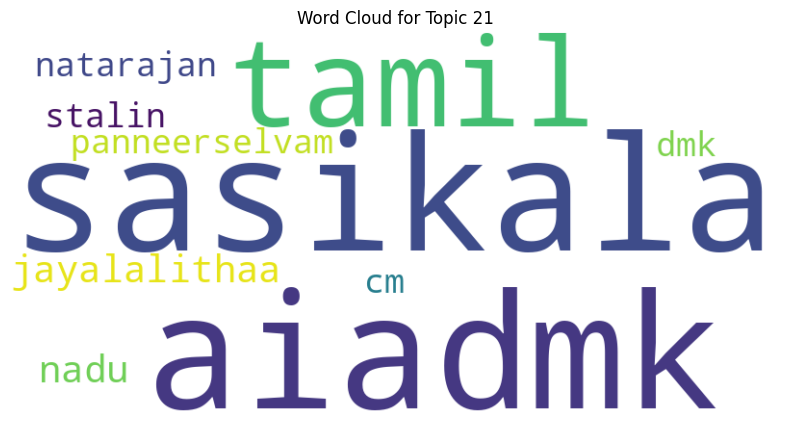

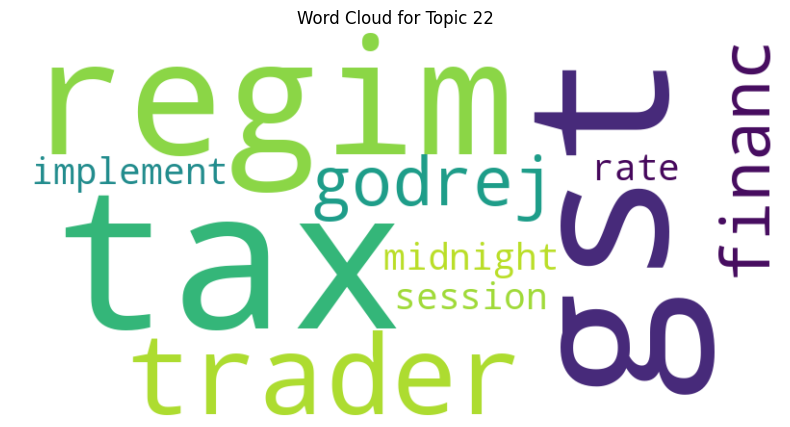

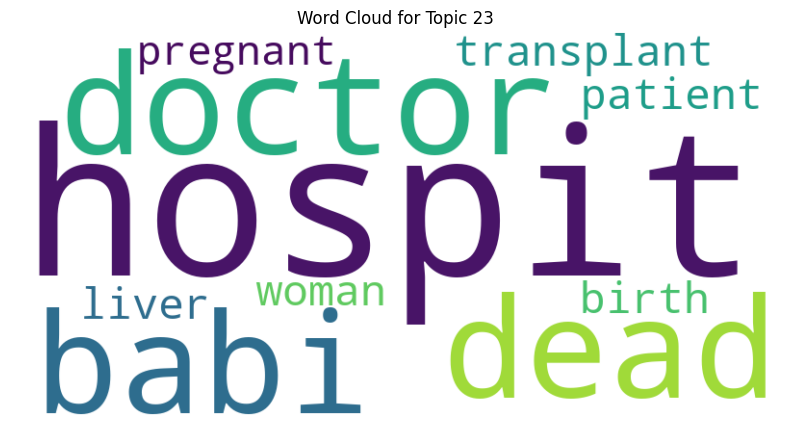

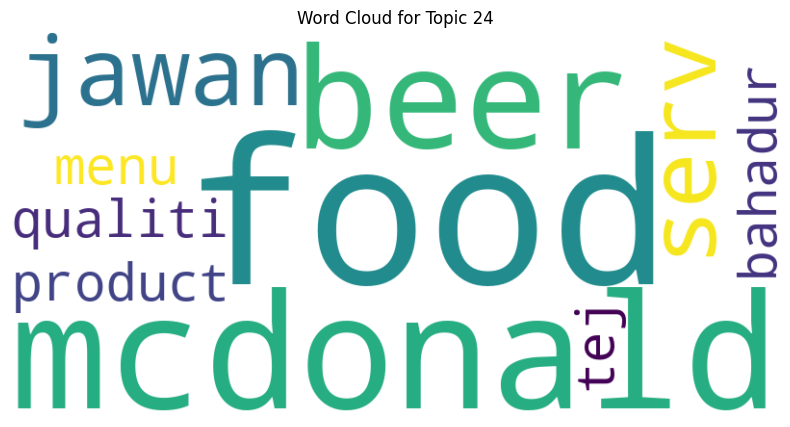

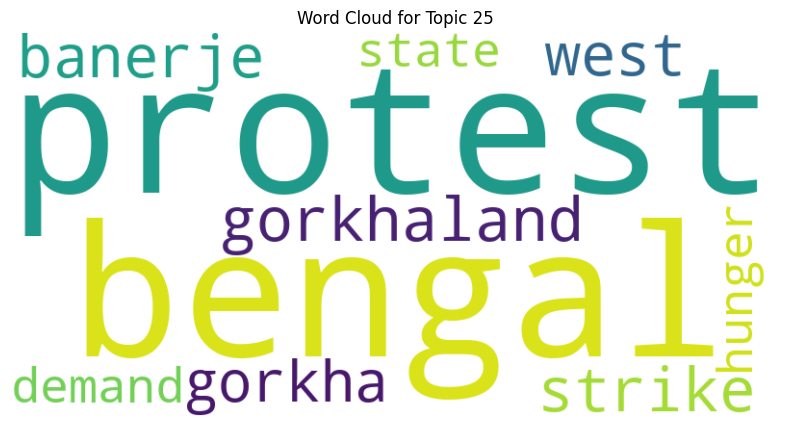

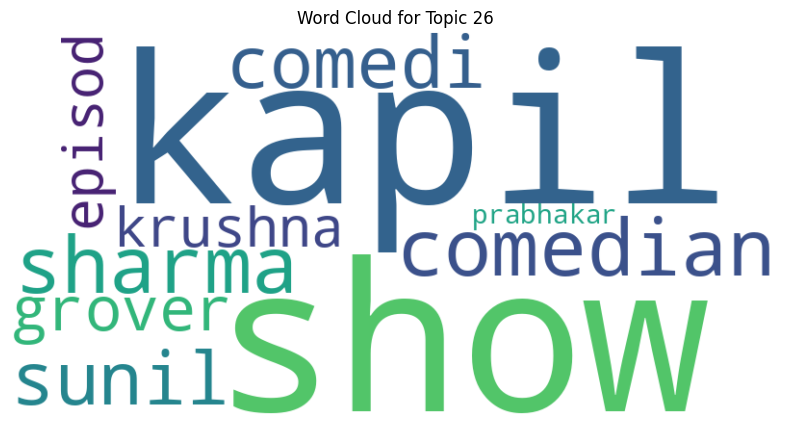

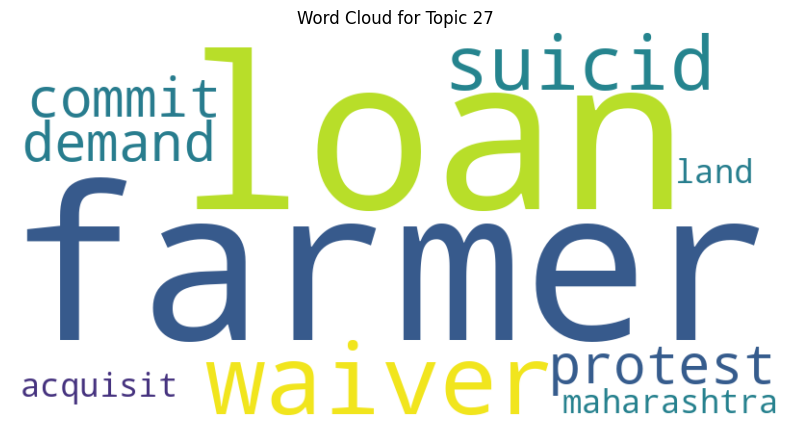

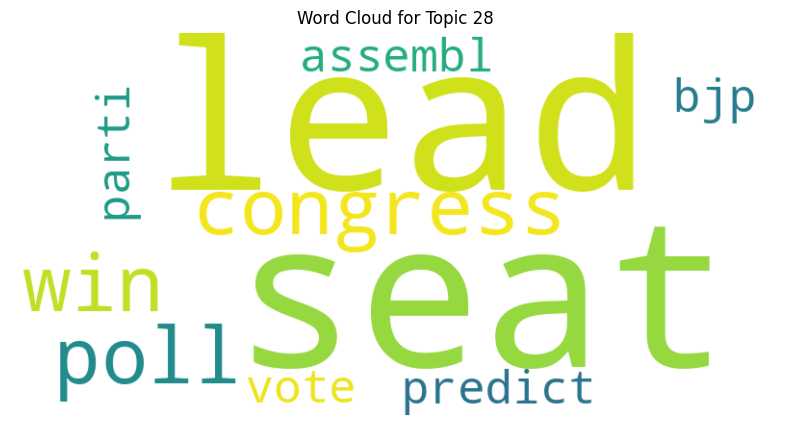

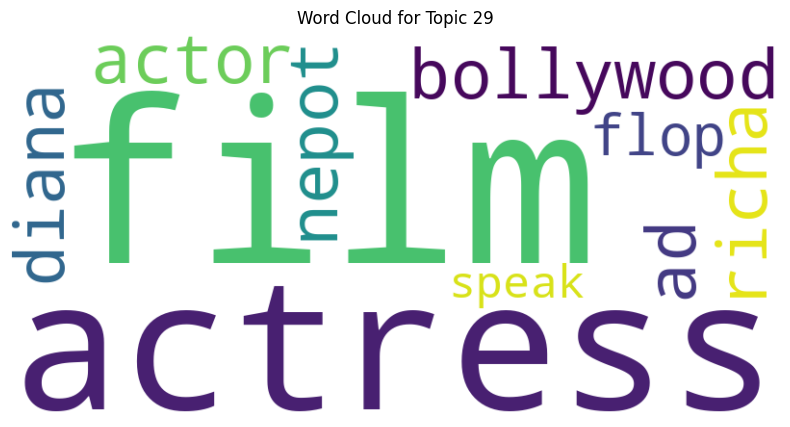

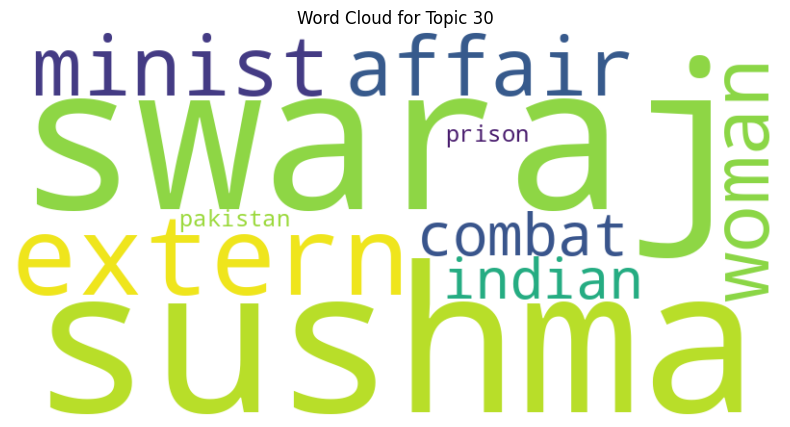

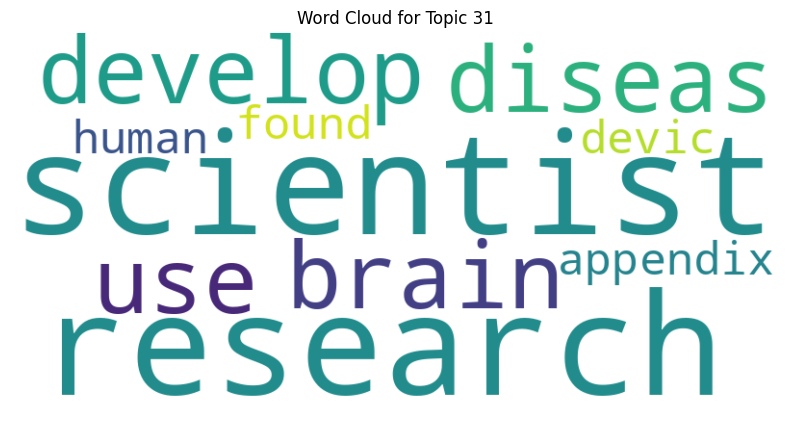

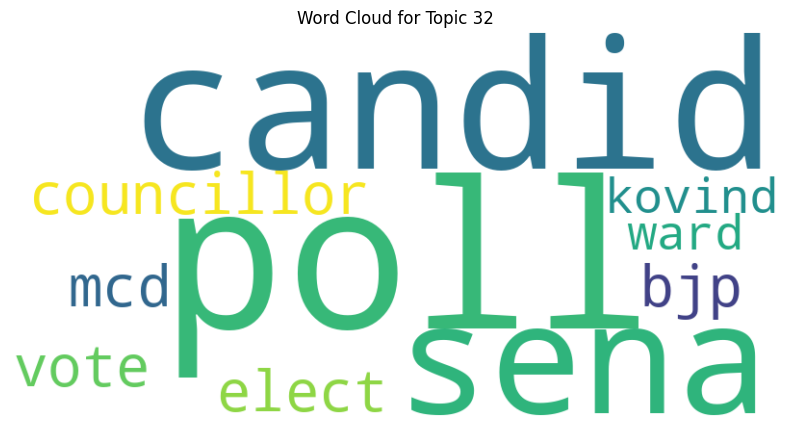

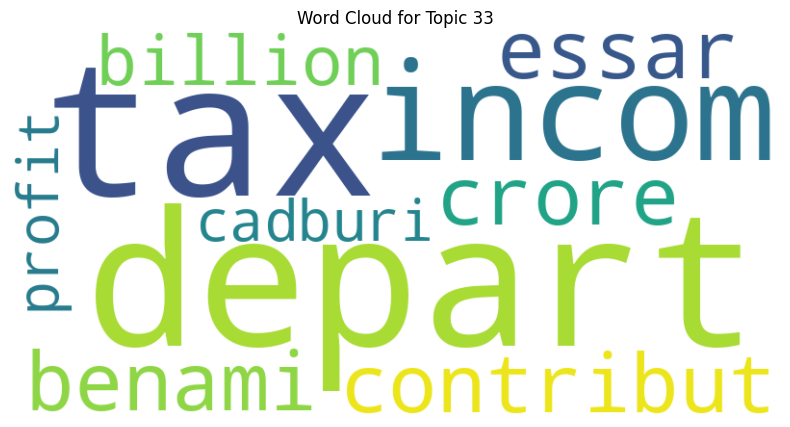

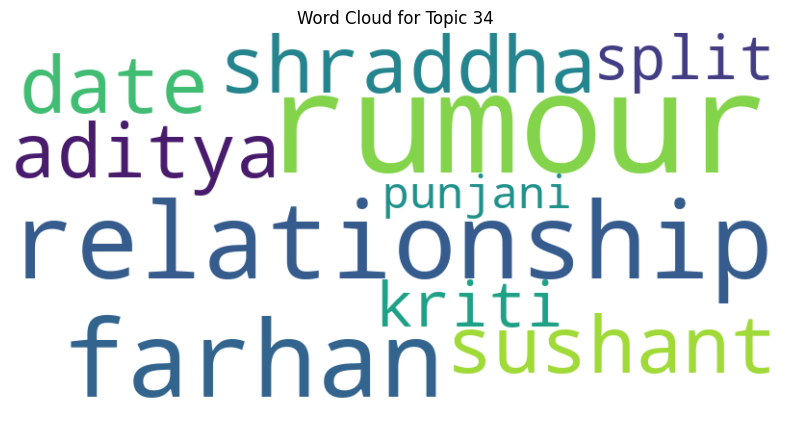

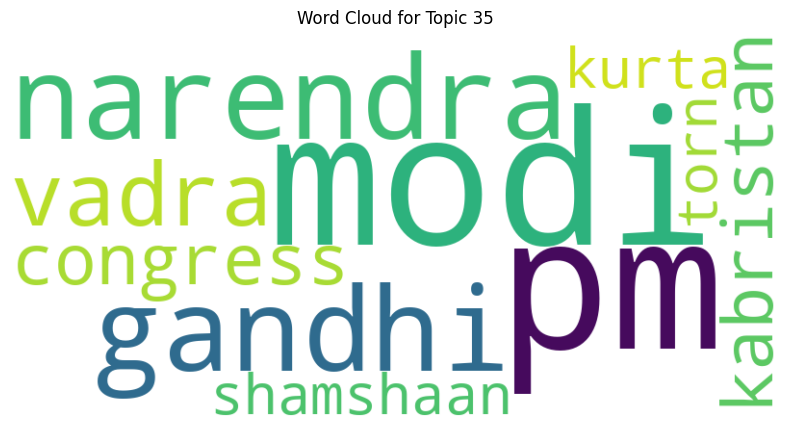

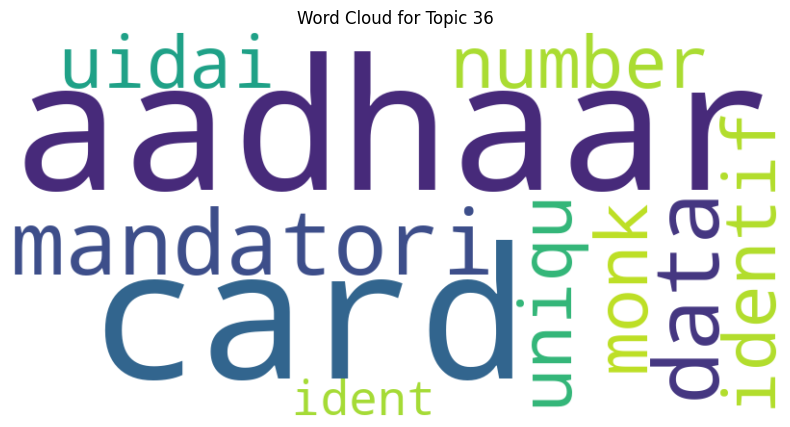

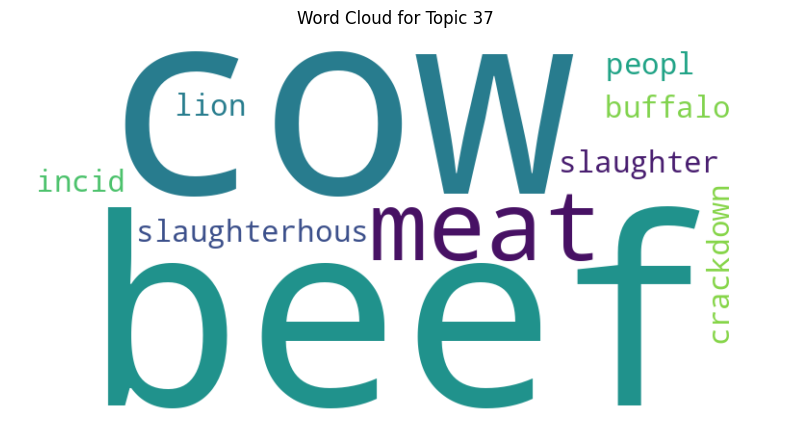

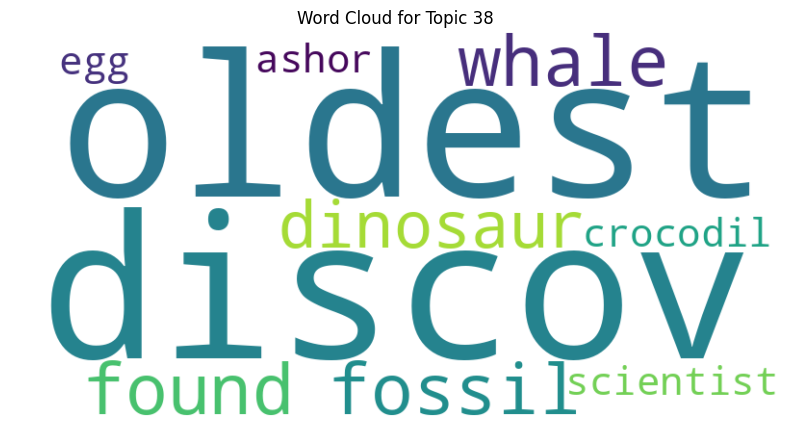

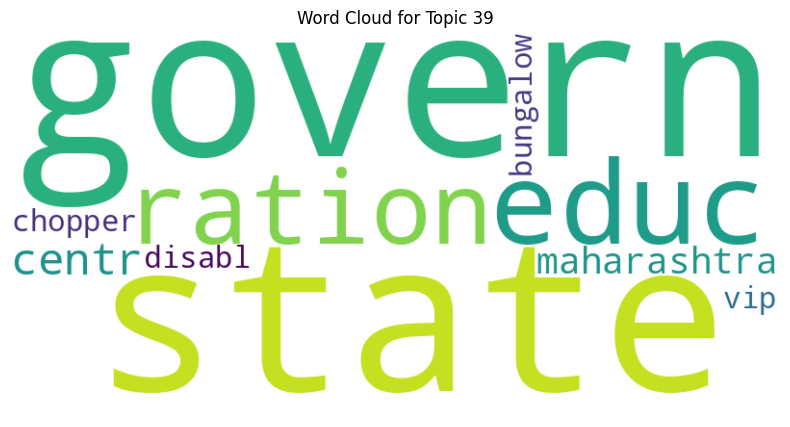

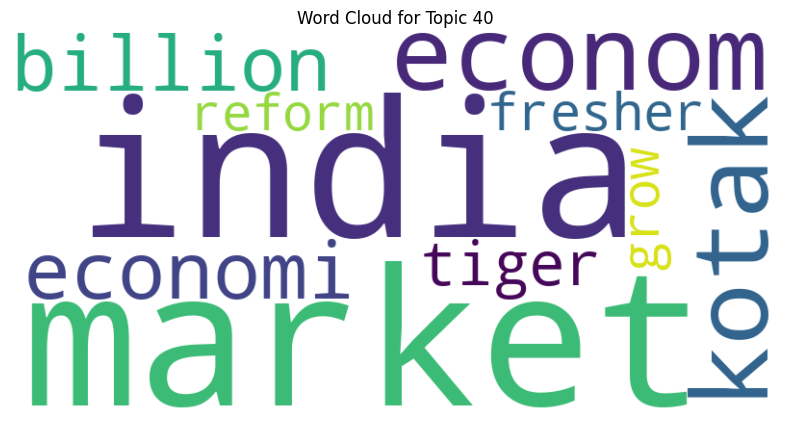

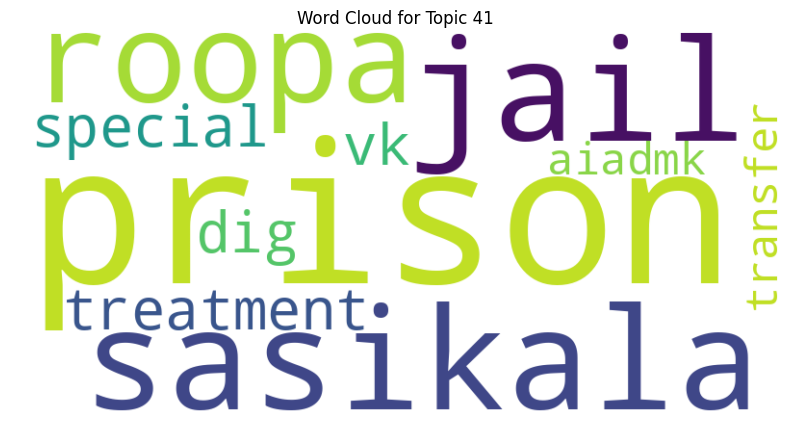

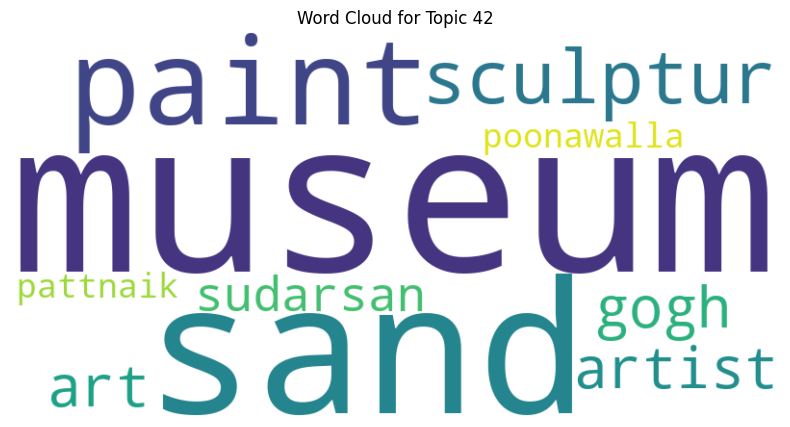

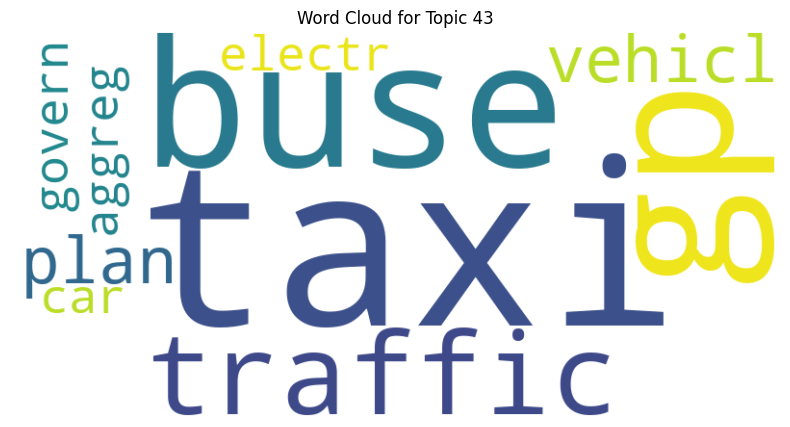

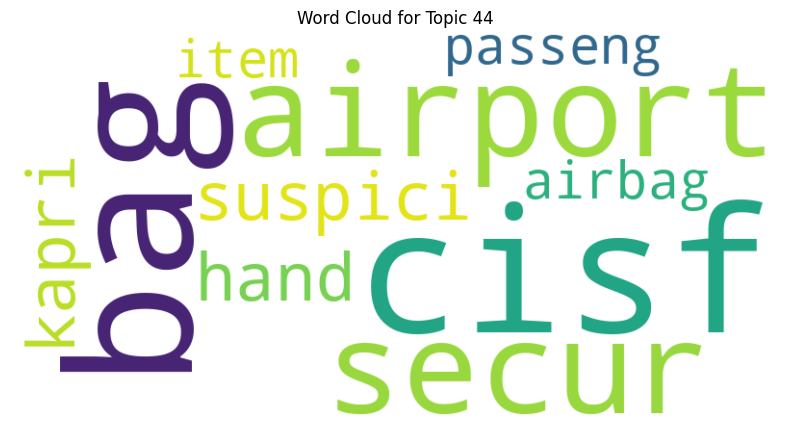

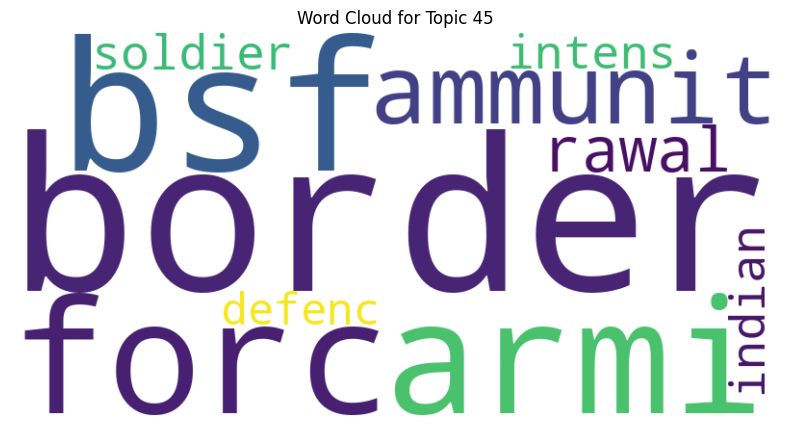

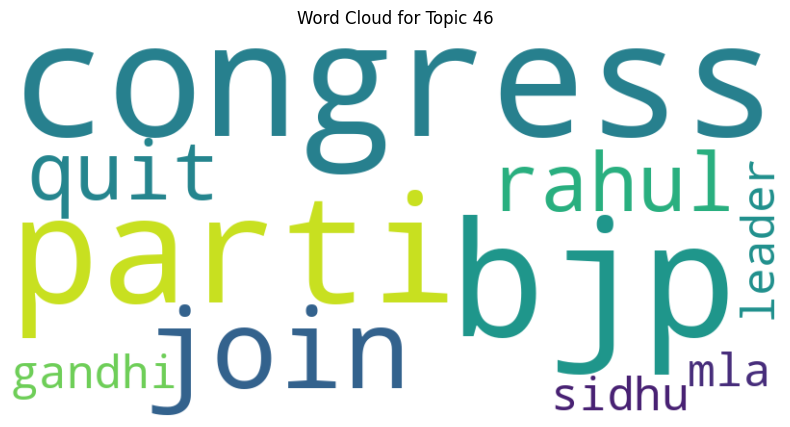

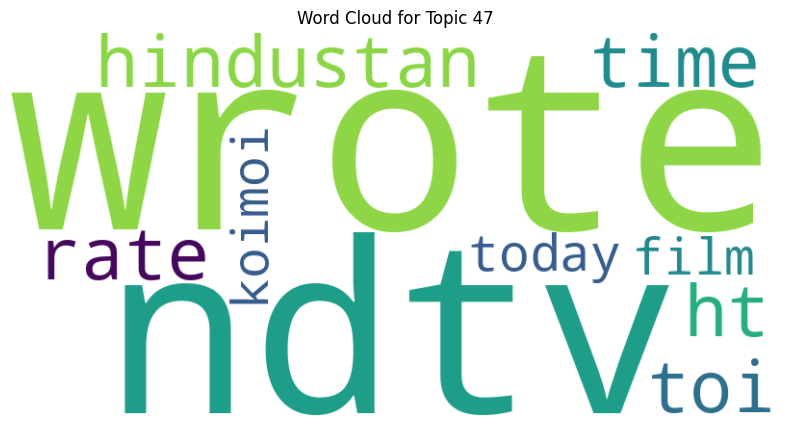

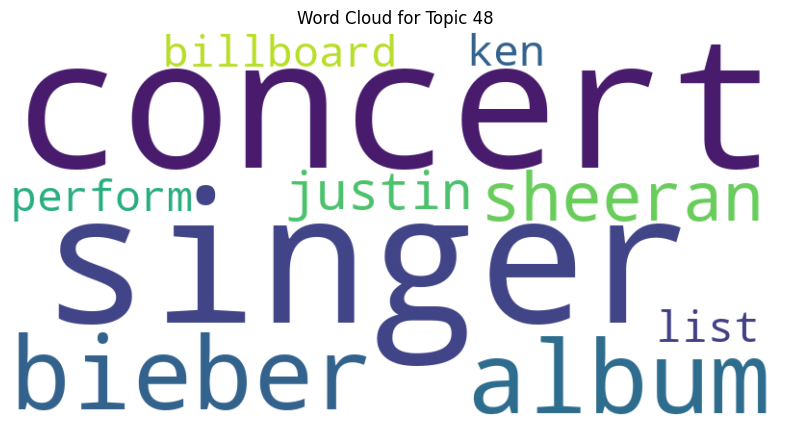

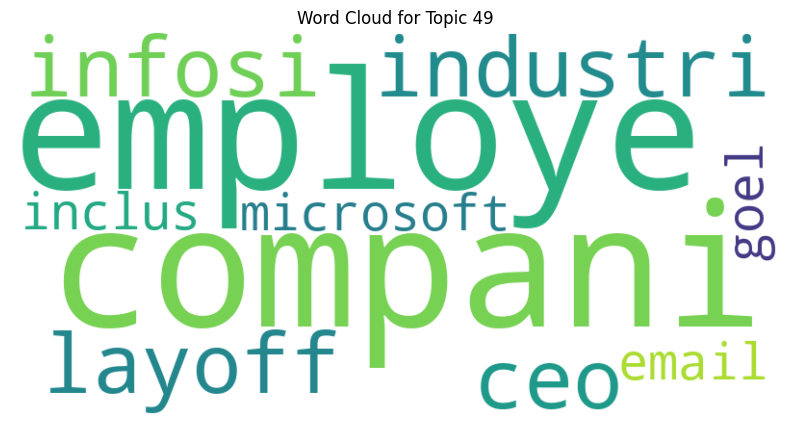

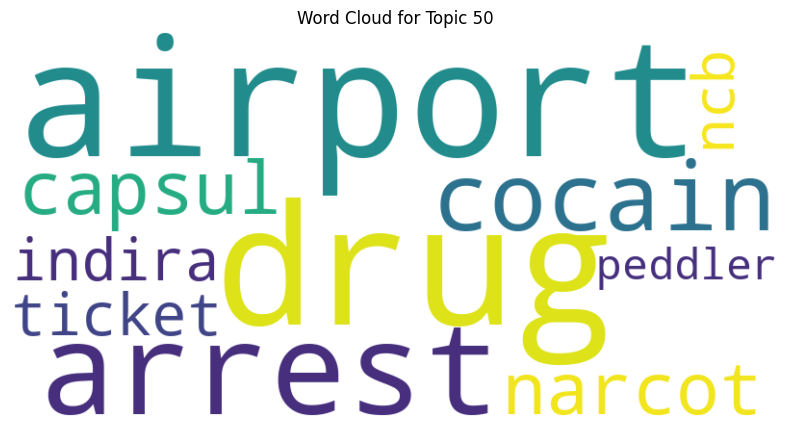

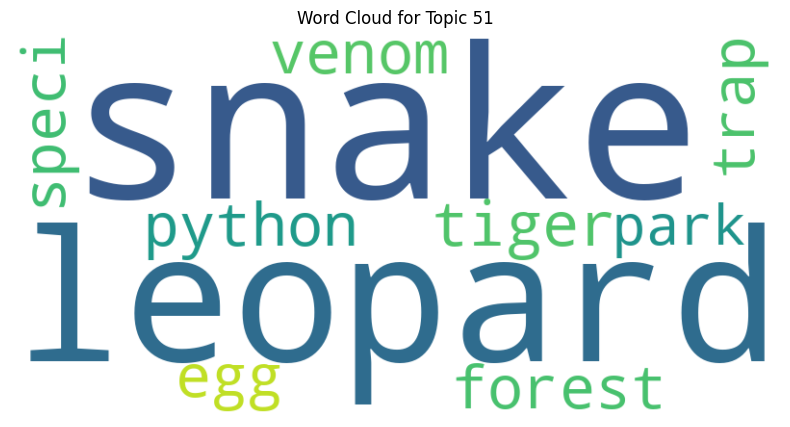

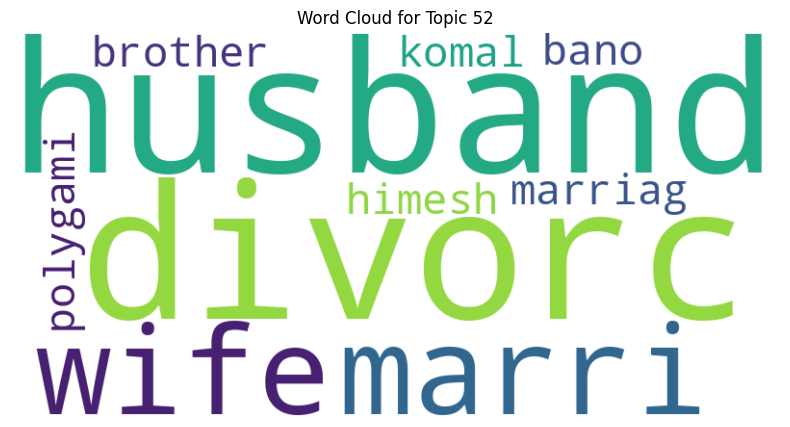

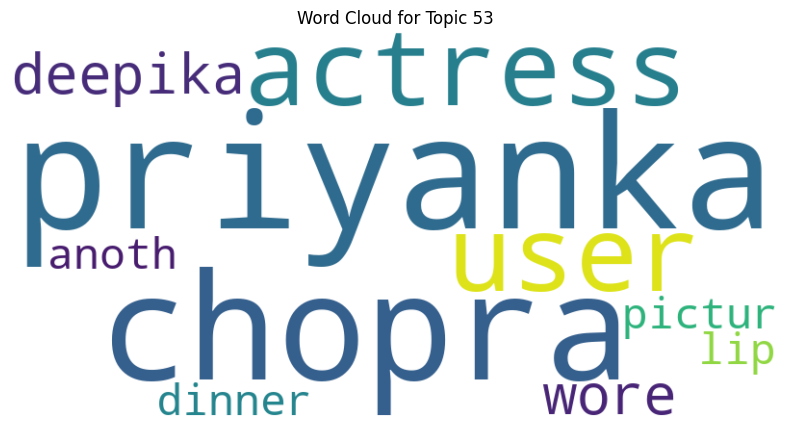

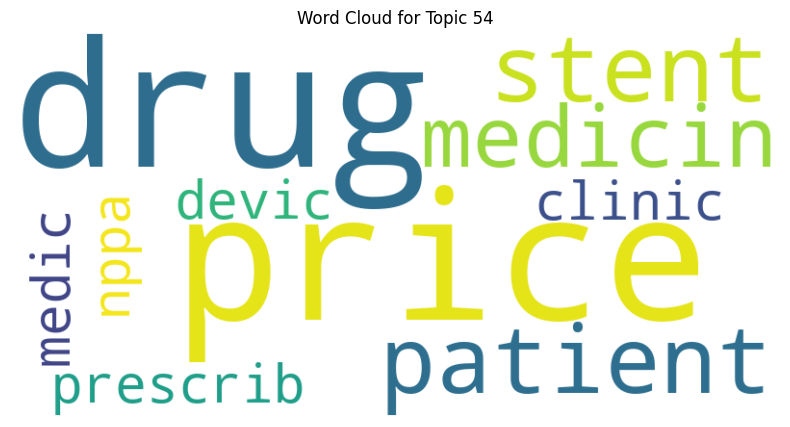

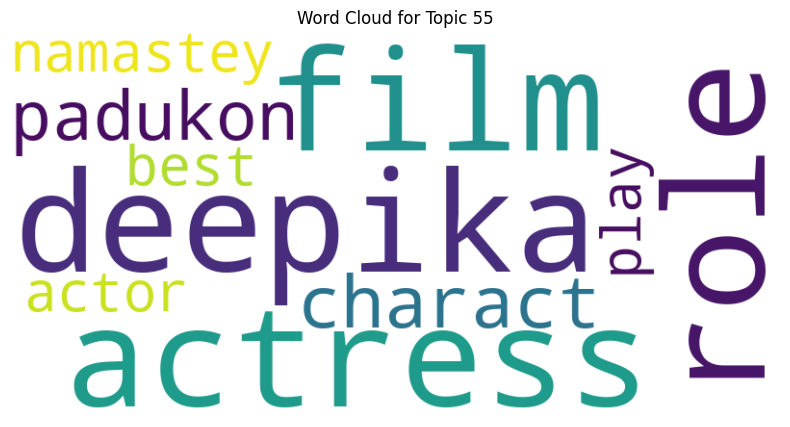

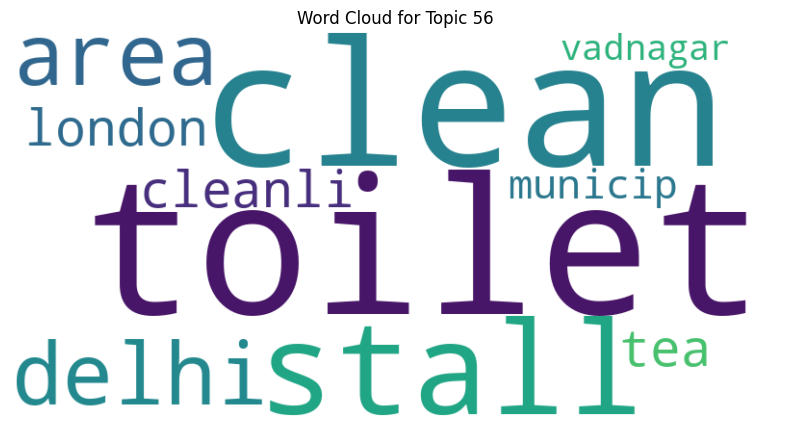

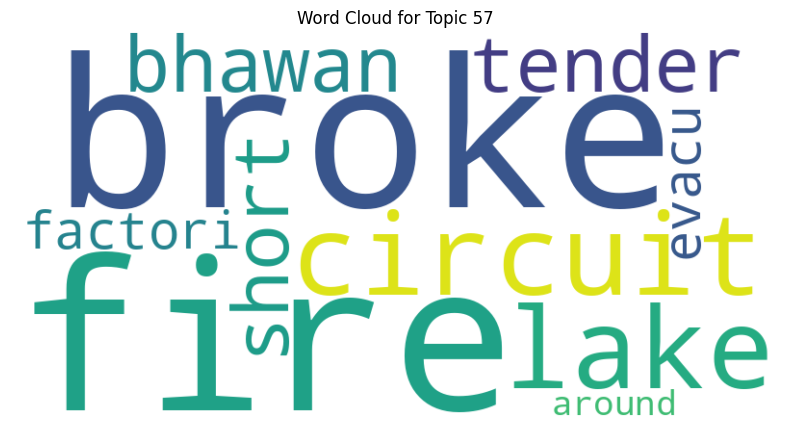

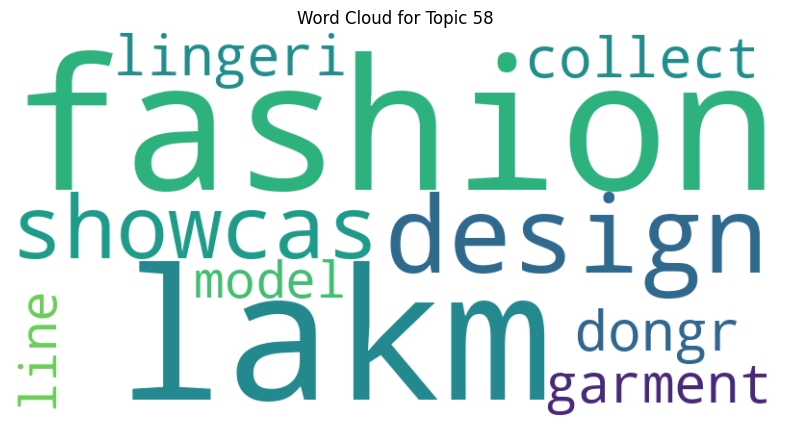

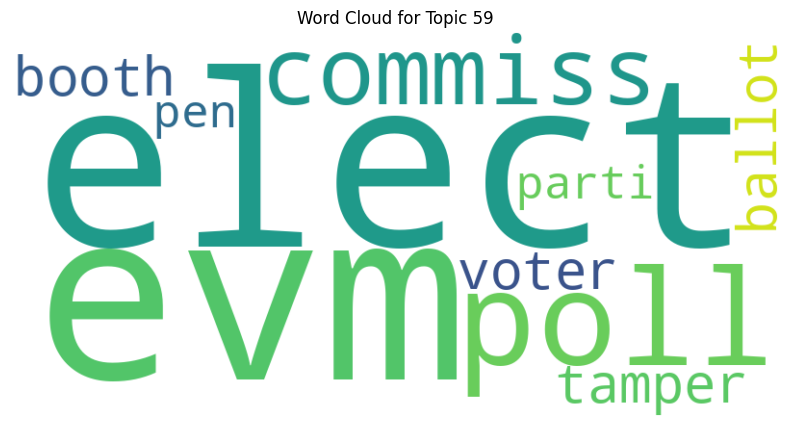

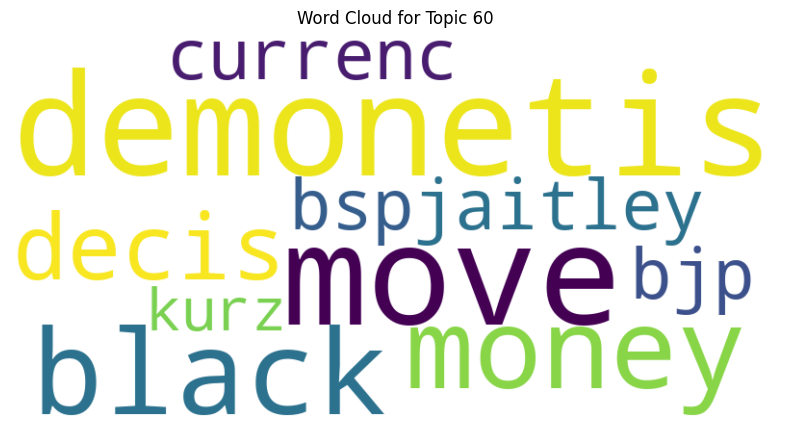

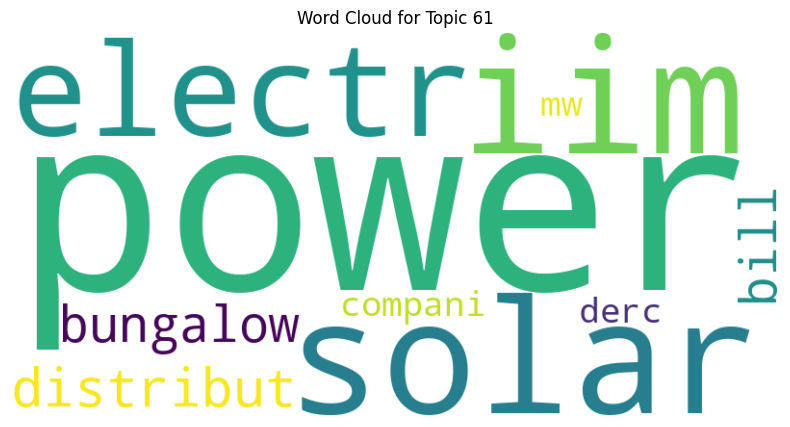

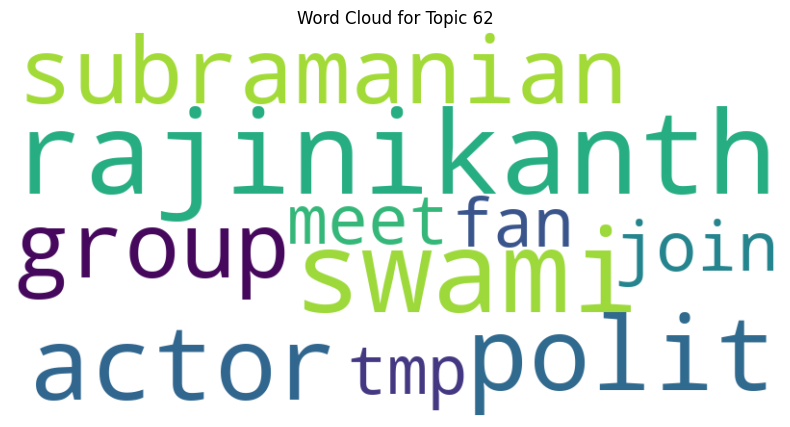

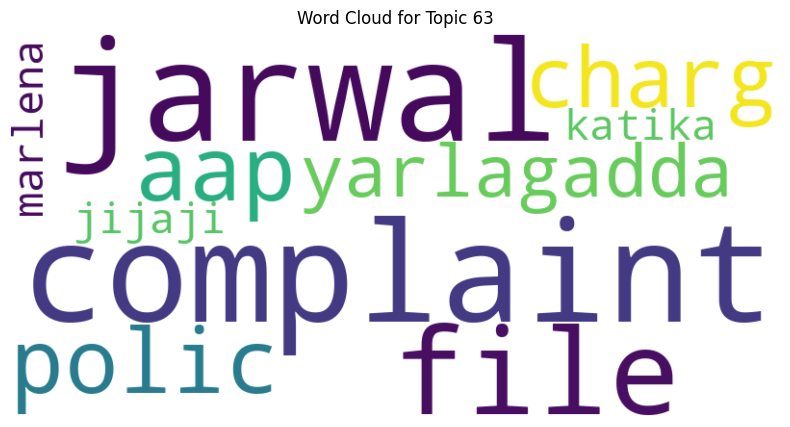

In [23]:
# Get the topics
topics = bertopic_model.get_topics()

# Generate word clouds for each topic
for topic_id, keywords in topics.items():
    # Extract words from tuples and join them into a single string
    topic_words = [word[0] for word in keywords]
    topic_words_str = ' '.join(topic_words)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic_words_str)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Topic {topic_id}")
    plt.axis("off")
    plt.show()